In [312]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from browser import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [313]:
TUNABLE = ['m_groups', 'k_winners', 'eps', 'boost_strength', 'fpartition', 'forget_mu']

In [314]:
exps = [
    'Flat_PTB_Explore',
    'Flat_PTB_Snipe'
]

paths = [os.path.expanduser("~/s3_jgordon/ray/results/{}".format(e)) for e in exps]
df = load_many(paths)

Loaded 47 experiments


In [315]:
df.loc[~df.k_winners_pct.isnull(), 'k_winners'] = df.k_winners_pct * df.m_groups
df.k_winners = df.k_winners.astype(int)

for tp in TUNABLE:
    if tp not in df:
        df[tp] = None
        
df.fillna(value={
    'forget_mu': 0.0,
    'dropout_p': 0.0
}, inplace=True)


In [316]:
def scatter_all_tunable(df, params=TUNABLE, ppl_cutoff=220):
    fig, axs = plt.subplots(len(params), 1, figsize=(8, 14), 
                            dpi=144, 
                            gridspec_kw={'hspace': 0.7})
    for ax, p in zip(axs, params):
        df[df.val_pred_ppl_min <= ppl_cutoff].plot(kind='scatter', x=p, y='val_pred_ppl_min', c='train_pred_ppl_min', colormap='viridis', ax=ax)
        ax.set_title("%s vs min val PPL" % p)
    plt.show()

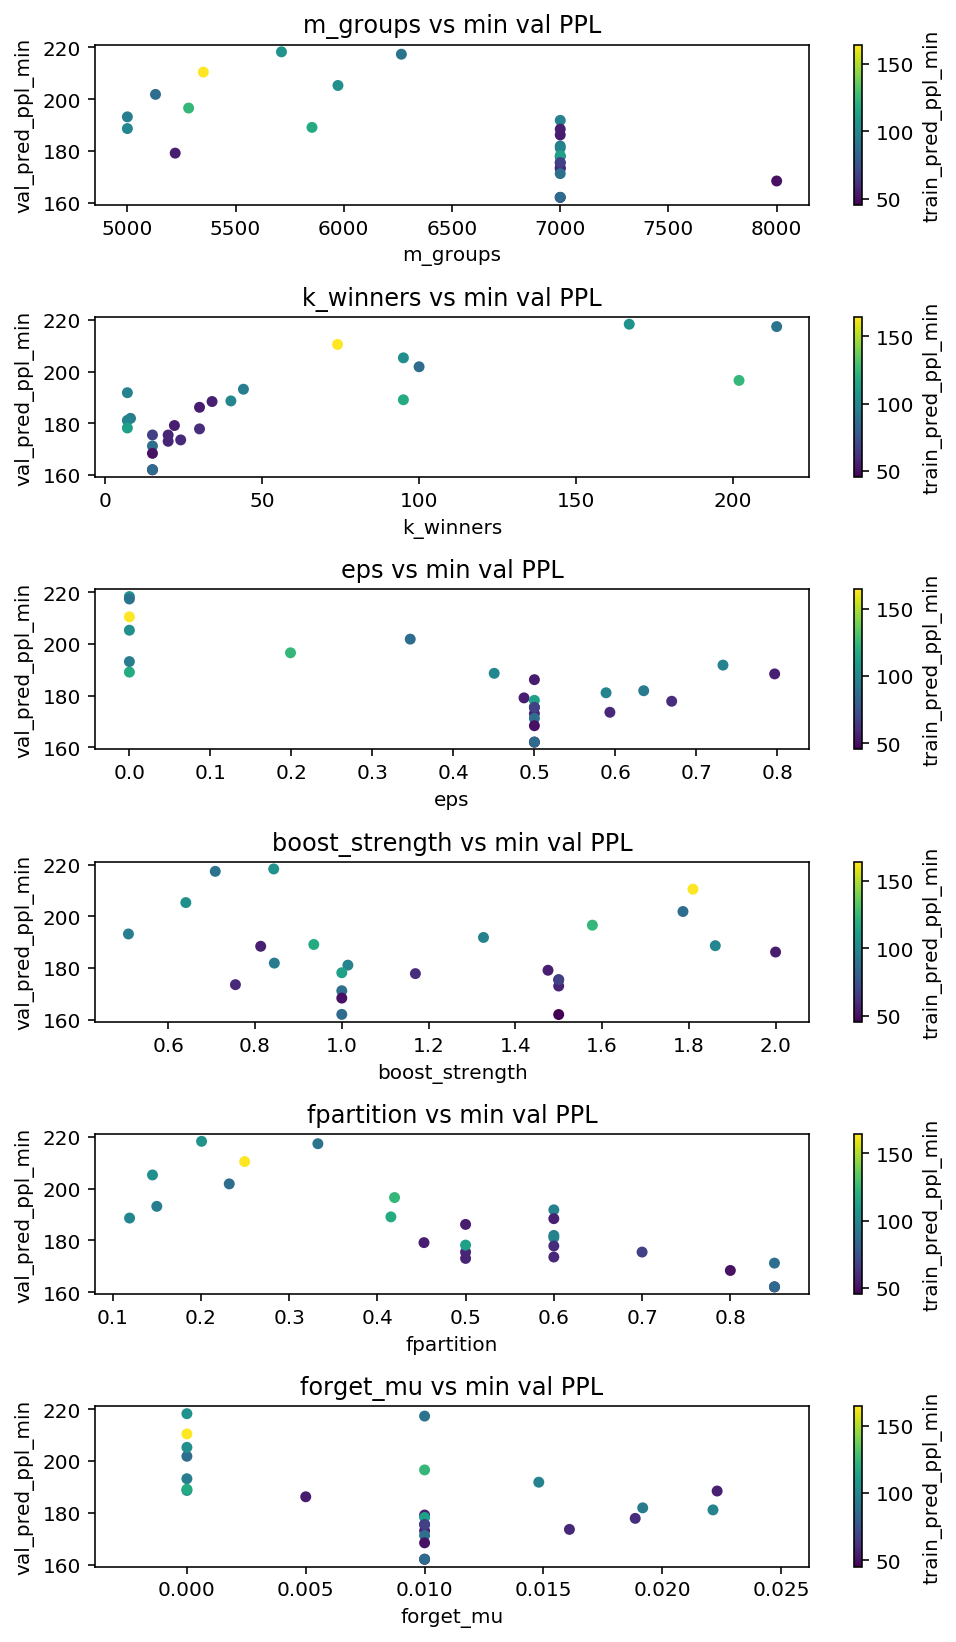

In [317]:
scatter_all_tunable(df)

In [318]:
df.sort_values('val_pred_ppl_min')[TUNABLE + ['val_pred_ppl_min', 'val_pred_acc_max']]

,m_groups,k_winners,eps,boost_strength,fpartition,forget_mu,val_pred_ppl_min,val_pred_acc_max
42,7000,15,0.500000,1.500000,0.850000,0.010000,162.030516,22.363878
46,7000,15,0.500000,1.000000,0.850000,0.010000,162.083793,22.406375
44,8000,15,0.500000,1.000000,0.800000,0.010000,168.384175,21.865870
43,7000,15,0.500000,1.000000,0.850000,0.010000,171.233200,21.512616
38,7000,20,0.500000,1.500000,0.500000,0.010000,173.047570,21.809326
31,7000,24,0.593219,0.754832,0.600000,0.016094,173.582597,21.734666
39,7000,20,0.500000,1.500000,0.500000,0.010000,175.468927,21.870941
41,7000,15,0.500000,1.500000,0.700000,0.010000,175.497827,21.528552
34,7000,30,0.669489,1.169682,0.600000,0.018861,177.845409,21.659173
40,7000,7,0.500000,1.000000,0.500000,0.010000,178.192506,20.714475


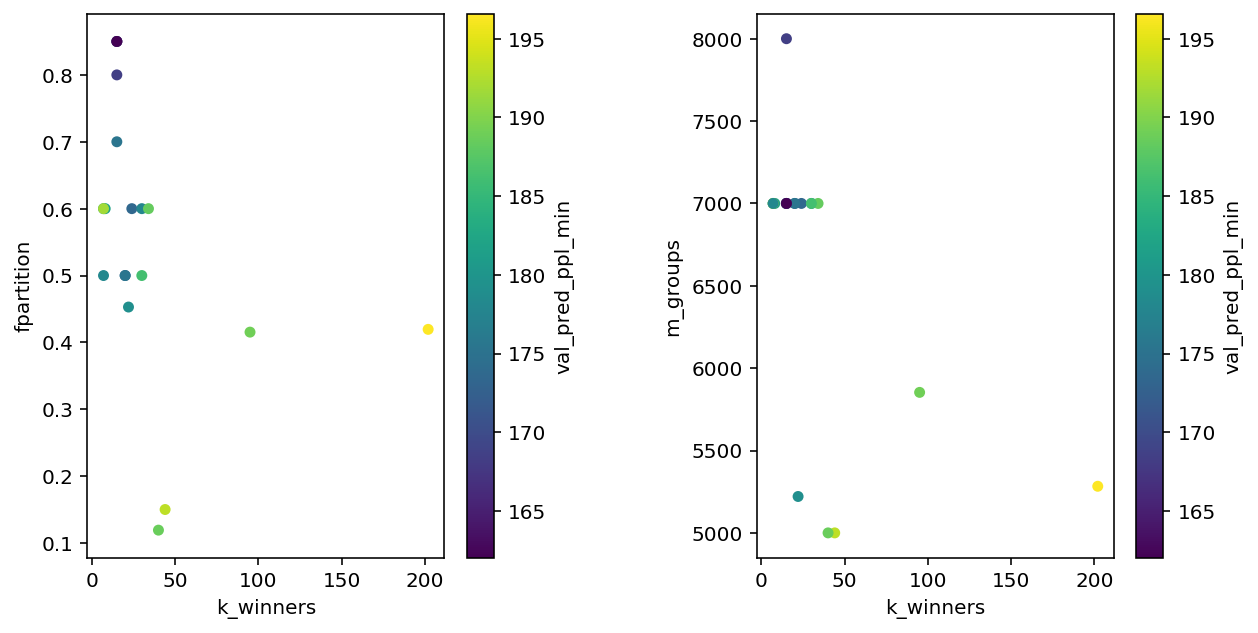

In [319]:
fig, axs = plt.subplots(1, 2, dpi=144, figsize=(10, 5), gridspec_kw={'wspace': 0.5})
df[df.val_pred_ppl_min < 200].plot(kind='scatter', x='k_winners', y='fpartition', c='val_pred_ppl_min', colormap='viridis', ax=axs[0])
df[df.val_pred_ppl_min < 200].plot(kind='scatter', x='k_winners', y='m_groups', c='val_pred_ppl_min', colormap='viridis', ax=axs[1])
plt.show()